In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./Test_Dataset/chris.jpg')
img.shape

(500, 367, 3)

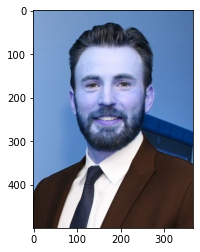

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(500, 367)

In [5]:
gray

array([[173, 173, 173, ..., 126, 126, 125],
       [174, 173, 173, ..., 127, 126, 125],
       [174, 173, 173, ..., 127, 127, 126],
       ...,
       [ 26,  26,  26, ...,  36,  36,  36],
       [ 25,  25,  25, ...,  36,  36,  36],
       [ 24,  24,  25, ...,  36,  36,  36]], dtype=uint8)

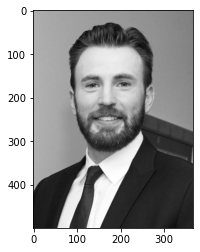

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./harcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./harcascade/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 67,  85, 209, 209]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(67, 85, 209, 209)

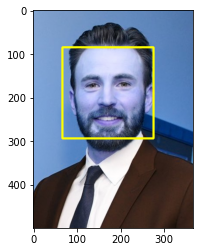

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),4)
plt.imshow(face_img)

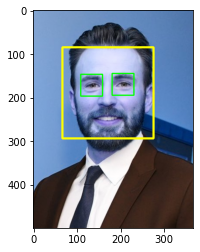

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

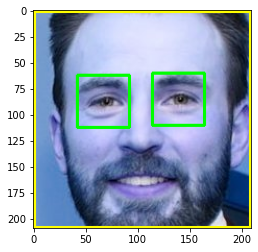

In [11]:
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not read image at", image_path)
        return None
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

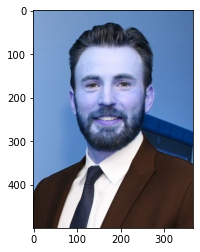

In [13]:
original_img = cv2.imread('./Test_Dataset/chris.jpg')
plt.imshow(original_img)

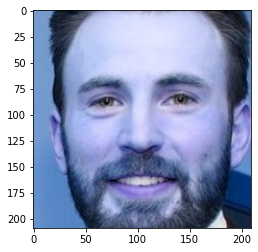

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./Test_Dataset/chris.jpg')
plt.imshow(cropped_image)

In [15]:
path_to_data = './Dataset/'
path_to_cr_data = './Dataset/cropped/'

In [16]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./Dataset/Black_Widow',
 './Dataset/Captain_America',
 './Dataset/Hulk',
 './Dataset/Iron_Man',
 './Dataset/Thor']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print('Generating cropped images in folder:', cropped_folder)
            cropped_file_name = celebrity_name + str(count)+ ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

Black_Widow
Generating cropped images in folder: ./Dataset/cropped/Black_Widow
Captain_America
Generating cropped images in folder: ./Dataset/cropped/Captain_America
Error: Could not read image at ./Dataset/Captain_America\Mark_Kassen__Tony_Cárdenas_and_Chris_Evans_(cropped).jpg
Hulk
Generating cropped images in folder: ./Dataset/cropped/Hulk
Iron_Man
Generating cropped images in folder: ./Dataset/cropped/Iron_Man
Thor
Generating cropped images in folder: ./Dataset/cropped/Thor


#### Manually exmaine cropped folder and delete any redundant images

In [20]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

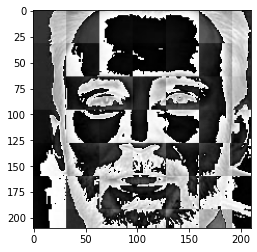

In [21]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

#### You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

In [22]:
celebrity_file_names_dict

{'Black_Widow': ['./Dataset/cropped/Black_Widow/Black_Widow1.png',
  './Dataset/cropped/Black_Widow/Black_Widow2.png',
  './Dataset/cropped/Black_Widow/Black_Widow3.png',
  './Dataset/cropped/Black_Widow/Black_Widow4.png',
  './Dataset/cropped/Black_Widow/Black_Widow5.png',
  './Dataset/cropped/Black_Widow/Black_Widow6.png',
  './Dataset/cropped/Black_Widow/Black_Widow7.png',
  './Dataset/cropped/Black_Widow/Black_Widow8.png',
  './Dataset/cropped/Black_Widow/Black_Widow9.png',
  './Dataset/cropped/Black_Widow/Black_Widow10.png',
  './Dataset/cropped/Black_Widow/Black_Widow11.png',
  './Dataset/cropped/Black_Widow/Black_Widow12.png',
  './Dataset/cropped/Black_Widow/Black_Widow13.png',
  './Dataset/cropped/Black_Widow/Black_Widow14.png',
  './Dataset/cropped/Black_Widow/Black_Widow15.png',
  './Dataset/cropped/Black_Widow/Black_Widow16.png',
  './Dataset/cropped/Black_Widow/Black_Widow17.png',
  './Dataset/cropped/Black_Widow/Black_Widow18.png',
  './Dataset/cropped/Black_Widow/Black_W

In [23]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'Black_Widow': 0, 'Captain_America': 1, 'Hulk': 2, 'Iron_Man': 3, 'Thor': 4}

In [24]:
X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        
        

In [25]:
len(X)

281

In [26]:
len(y)

281

In [27]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(281, 4096)

In [28]:
X[0]

array([ 64.,  97., 120., ..., 236.,  11.,   9.])

In [29]:
# Training the model- Using SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [30]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)

In [31]:
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.6901408450704225

In [32]:
len(X_test)

71

In [33]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.88      0.50      0.64        14
           2       0.67      0.82      0.74        17
           3       0.50      0.29      0.36        14
           4       0.75      0.92      0.83        13

    accuracy                           0.69        71
   macro avg       0.69      0.69      0.67        71
weighted avg       0.69      0.69      0.67        71



In [34]:
# Grid Search CV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [35]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [36]:
scores = []
best_estimators = {}
import pandas as pd
for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_Score':clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_Score','best_params'])
df
    

,model,best_Score,best_params
0,svm,0.714286,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.500000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.761905,{'logisticregression__C': 1}


In [37]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [38]:
best_estimators['svm'].score(X_test,y_test)

0.6901408450704225

In [39]:
best_estimators['random_forest'].score(X_test,y_test)

0.49295774647887325

In [40]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7183098591549296

In [41]:
best_clf = best_estimators['svm']

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[11,  0,  1,  1,  0],
       [ 2,  9,  1,  0,  2],
       [ 0,  0, 13,  2,  2],
       [ 5,  0,  2,  4,  3],
       [ 1,  0,  0,  0, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

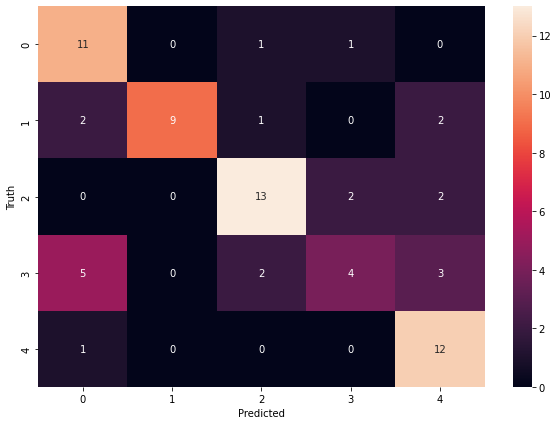

In [43]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
class_dict

{'Black_Widow': 0, 'Captain_America': 1, 'Hulk': 2, 'Iron_Man': 3, 'Thor': 4}

In [45]:
# Save the trained model
!pip install joblib
import joblib
# save the model as a pickle in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [46]:
#save class dictionary
import json
with open('class_dictonary.json','w') as f:
    f.write(json.dumps(class_dict))